In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aslcsv/train.csv
/kaggle/input/aslcsv/test.csv


IMPORTING LIBRARIES

In [2]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization
import pandas as pd
import numpy as np
import csv
from keras.models import Sequential

IMPORT DATASET

In [3]:
train = pd.read_csv('/kaggle/input/aslcsv/train.csv')
test = pd.read_csv('/kaggle/input/aslcsv/test.csv')

SHUFFLING DATASET

In [4]:
train = train.sample(frac = 1)
print(train)
test = test.sample(frac = 1)
print(test)

      Unnamed: 0 char    area   perimeter  roundness     ratio
3108        3108    M  1763.0  183.053823   0.660822  1.404762
3793        3793    P  1398.5  221.923880   0.356651  0.844828
77            77    A  1446.5  166.325901   0.656732  1.256410
5298        5298    V  1178.5  227.497474   0.286000  1.628571
1156        1156    E  1437.0  161.740114   0.689939  1.606061
...          ...  ...     ...         ...        ...       ...
5060        5060    U  1133.5  163.012193   0.535761  2.222222
5563        5563    W  1096.5  258.953318   0.205379  1.966667
1195        1195    E  1423.5  163.154328   0.671661  1.656250
4448        4448    R   970.5  158.325901   0.486274  2.107143
1253        1253    F  1226.0  221.053823   0.315126  1.696970

[6500 rows x 6 columns]
      Unnamed: 0 char    area   perimeter  roundness     ratio
1175        1175    V  1020.0  215.882250   0.274888  2.068966
152          152    C  1174.0  201.338094   0.363752  1.111111
733          733    N  1815.0 

CONVERTING LABELS IN RANGE OF 1 TO 25

In [41]:
alpha_dict = {}
for i in range(26):
  alpha_dict[chr(65+i)]=i
train['char'] = train.char.apply(lambda x: alpha_dict[x])

KeyError: 12

In [7]:
y = train['char'].to_numpy()

In [8]:
y_train=[]
for i in y:
  temp=[]
  for j in range(26):
    if(i==j):
      temp.append(1)
    else:
      temp.append(0)
  y_train.append(temp)

In [9]:
x_train = np.column_stack((train.area.values,train.perimeter.values,train.roundness.values,train.ratio.values))

In [10]:
x_train=x_train.tolist()

BULDIND ML STRUCTURE OF FULLY CONNECTED NETWORK

In [15]:
model= Sequential()

model.add(Dense(128, input_shape=(4,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(26))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               640       
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 activation_5 (Activation)   (None, 64)                0         
                                                      

In [18]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [19]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


TRAINING MODEL

In [20]:
history = model.fit(x_train,y_train, batch_size=4, epochs=16)

Epoch 1/16
1625/1625 [==============================] - 7s 3ms/step - loss: 3.2169 - accuracy: 0.0878
Epoch 2/16
1625/1625 [==============================] - 6s 4ms/step - loss: 2.8980 - accuracy: 0.1322
Epoch 3/16
1625/1625 [==============================] - 6s 3ms/step - loss: 2.7628 - accuracy: 0.1402
Epoch 4/16
1625/1625 [==============================] - 6s 3ms/step - loss: 2.6902 - accuracy: 0.1585
Epoch 5/16
1625/1625 [==============================] - 6s 3ms/step - loss: 2.6401 - accuracy: 0.1603
Epoch 6/16
1625/1625 [==============================] - 6s 3ms/step - loss: 2.5974 - accuracy: 0.1655
Epoch 7/16
1625/1625 [==============================] - 5s 3ms/step - loss: 2.5948 - accuracy: 0.1711
Epoch 8/16
1625/1625 [==============================] - 6s 3ms/step - loss: 2.5680 - accuracy: 0.1678
Epoch 9/16
1625/1625 [==============================] - 5s 3ms/step - loss: 2.5579 - accuracy: 0.1748
Epoch 10/16
1625/1625 [==============================] - 6s 4ms/step - loss: 2.523

In [52]:
history2=model.fit(x_train,y_train, batch_size=32, epochs=128)

Epoch 1/128
204/204 [==============================] - 1s 4ms/step - loss: 1.0940 - accuracy: 0.5726
Epoch 2/128
204/204 [==============================] - 1s 4ms/step - loss: 1.0759 - accuracy: 0.5794
Epoch 3/128
204/204 [==============================] - 1s 4ms/step - loss: 1.0638 - accuracy: 0.5845
Epoch 4/128
204/204 [==============================] - 1s 4ms/step - loss: 1.0724 - accuracy: 0.5797
Epoch 5/128
204/204 [==============================] - 1s 5ms/step - loss: 1.0721 - accuracy: 0.5860
Epoch 6/128
204/204 [==============================] - 1s 4ms/step - loss: 1.0772 - accuracy: 0.5803
Epoch 7/128
204/204 [==============================] - 1s 4ms/step - loss: 1.0561 - accuracy: 0.5894
Epoch 8/128
204/204 [==============================] - 1s 4ms/step - loss: 1.0893 - accuracy: 0.5715
Epoch 9/128
204/204 [==============================] - 1s 4ms/step - loss: 1.1021 - accuracy: 0.5742
Epoch 10/128
204/204 [==============================] - 1s 4ms/step - loss: 1.0973 - accura

In [31]:
from matplotlib import pyplot as plot

PLOTTING GRAPH OF ACCURACY

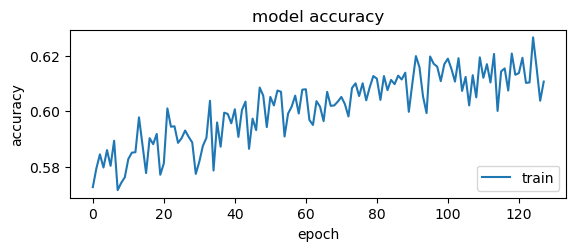

In [53]:
plot.subplot(2,1,1)
plot.plot(history2.history['accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

EVALUATING MODEL

In [43]:
test['char'] = test.char.apply(lambda x: alpha_dict[x])

KeyError: 21

In [44]:
y = test['char'].to_numpy()
y_test=[]
for i in y:
  temp=[]
  for j in range(26):
    if(i==j):
      temp.append(1)
    else:
      temp.append(0)
  y_test.append(temp)

In [45]:
x_test = np.column_stack((test.area.values,test.perimeter.values,test.roundness.values,test.ratio.values))

In [46]:
x_test=x_test.tolist()

In [47]:
eva_l=model.evaluate(x_test,y_test)

45/45 [==============================] - 0s 3ms/step - loss: 1.0017 - accuracy: 0.5734


KeyError: 'val_accuracy'

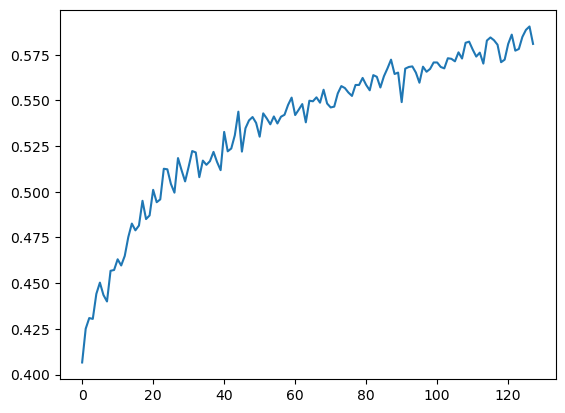

In [50]:
plot.plot(history2.history['accuracy'])
plot.plot(history2.history['val_accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'val'], loc='upper left')
plot.show()

In [51]:
print(eva_l)

[1.0016521215438843, 0.5734265446662903]


AttributeError: 'list' object has no attribute 'history'

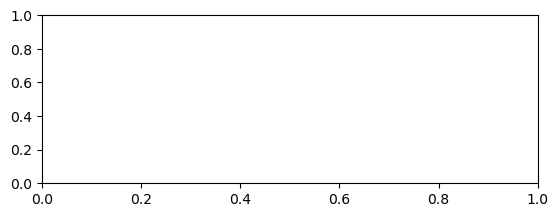

In [48]:
plot.subplot(2,1,1)
plot.plot(eva_l.history['accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

SAVING MODEL

In [54]:
model.save('aslcsv.h5')

In [62]:
result=np.round(model.predict(np.array([[1389.5,230.610171675682, 0.328164253617696, 1.09090909090909]])))

1/1 [==============================] - 0s 24ms/step


In [63]:
print(result)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
